## Problem to Solve

We focus on 2 of the review-based tasks: review reading comprehension (RRC), aspect extraction (AE) and aspect sentiment classification (ASC).

1. AE: given a review sentence ("The retina display is great."), find aspects("retina display");

2. ASC: given an aspect ("retina display") and a review sentence ("The retina display is great."), detect the polarity of that aspect (positive).

E2E-ABSA: the combination of the above two tasks as a sequence labeling task.

## Convert our labelled dataset into the required format

Review ID | term | sentence | polarity

In [2]:
import pandas as pd
absa = pd.read_excel('annotated_absa.xlsx')

In [3]:
absa.shape #filter some first

(300, 27)

In [4]:
absa 

,S/N,In-charge,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_stopwordsrm,comments_stopwordsrm_lemma,...,communicate_aspect,communicate_score,value_entity,value_aspect,value_score,location_entity,location_aspect,location_score,Category,Sentiment
0,1,SX,11391287,208136450,2017-10-31,68485599,Ali,Fantastic location and fantastic hosts for a v...,fantastic location fantastic hosts reasonable ...,fantastic location fantastic host reasonable p...,...,fantastic,5,price,reasonable,4,location,fantastic,5,location,positive
1,2,SX,50319142,574451000000000000,2022-03-03,81633638,Christophe,Super happy with this stylish and comfy apartm...,super happy stylish comfy apartment family eas...,super happy stylish comfy apartment family eas...,...,easy,4,NaN,NaN,3,NaN,NaN,3,communicate,positive
2,3,SX,272282,52814653,2015-11-02,8528459,Rebecca,Mar made us feel very welcomed with great dire...,mar made us feel welcomed great directions gue...,mar make -PRON- feel welcome great direction g...,...,great,5,NaN,NaN,3,train,located,4,communicate,positive
3,4,SX,4683548,475841000000000000,2021-10-18,190705793,Ron,Andres is an amazing host! <br/>Not only the a...,andres amazing host not apartment see pictures...,andres amazing host not apartment see picture ...,...,NaN,5,NaN,NaN,3,NaN,NaN,3,accurate,positive
4,5,SX,7838608,192308789,2017-09-10,12034187,Giuseppe,A lovely room which was spacious and clean. Al...,a lovely room spacious clean also great suppor...,a lovely room spacious clean also great suppor...,...,host,4,NaN,NaN,3,NaN,NaN,3,cleanliness,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,LT,19154124,623526283,2020-05-01,261715322,Ivan,"Super host, super flat",super host super flat,super host super flat,...,NaN,3,flat,superb,5,NaN,NaN,3,value,positive
296,297,LT,5645973,304396739,2018-08-09,164747779,Arielle,We had a wonderful time in Barcelona! <br/>The...,we wonderful time barcelona the apartment pret...,wonderful time barcelona the apartment pretty...,...,NaN,3,apartment,good,5,location,good,4,value,positive
297,298,LT,23233260,451844194,2019-05-12,242067326,Sophie,"Beautifully modern and stylish apartment, nice...",beautifully modern stylish apartment nice sepa...,beautifully modern stylish apartment nice sepa...,...,NaN,3,NaN,NaN,3,location,central,5,location,positive
298,299,LT,1916224,195374111,2017-09-19,93750103,Scott,This spot is great for 3-4 people or less. Ex...,this spot great people less extremely convenie...,this spot great people less extremely convenie...,...,NaN,3,NaN,NaN,3,location,convenient,4,location,positive


In [5]:
absa.columns

Index(['S/N', 'In-charge', 'listing_id', 'id', 'date', 'reviewer_id',
       'reviewer_name', 'comments', 'comments_stopwordsrm',
       'comments_stopwordsrm_lemma', 'accuracy_entity', 'accuracy_aspect',
       'accuracy_score', 'clean_entity', 'clean_aspect', 'clean_score',
       'communicate_entity', 'communicate_aspect', 'communicate_score',
       'value_entity', 'value_aspect', 'value_score', 'location_entity',
       'location_aspect', 'location_score', 'Category', 'Sentiment'],
      dtype='object')

In [6]:
#for each categorycategory, combine terms E and A'''
#for cat in ['accuracy', 'clean', 'communicate', 'value', 'location']:
    #absa[cat+"_"+"merged"] = absa[cat+"_"+"entity"] + absa[cat+"_"+"aspect"]

def merge_terms(row, cat='accuracy'):
    try:
        merged = ''
        #print(cat+"_"+"entity")
        #print(row[cat+"_"+"entity"])
        #print(row[cat+"_"+"aspect"])
        if row[cat+"_"+"entity"] and row[cat+"_"+"aspect"]:
            merged = row[cat+"_"+"entity"]+" "+row[cat+"_"+"aspect"]
        elif row[cat+"_"+"entity"] and not row[cat+"_"+"aspect"]:
            merged = row[cat+"_"+"entity"]
        elif not row[cat+"_"+"entity"] and row[cat+"_"+"aspect"]:
            merged = row[cat+"_"+"aspect"]
    except:
        merged = None
    return merged

#absa['accuracy_merged'] = absa['accuracy_entity'] + " " + absa['accuracy_entity']

In [7]:
absa.apply(merge_terms, axis = 1)[:10]

0                       None
1            amenities great
2    bathrooms well equipped
3               pictures see
4                       None
5          apartment exactly
6                       None
7                       None
8               boiler small
9        description matched
dtype: object

In [8]:
for cat in ['accuracy', 'clean', 'communicate', 'value', 'location']:
    absa[cat+"_"+"merged"] = absa.apply(merge_terms, cat= cat, axis = 1)

In [10]:
absa_score = pd.melt(absa, id_vars=['S/N', 'In-charge', 'listing_id', 'id', 'date', 'reviewer_id',
       'reviewer_name', 'comments', 'comments_stopwordsrm',
       'comments_stopwordsrm_lemma'],
        var_name='aspect_category',
        value_vars=['accuracy_score','clean_score', 
       'communicate_score', 'value_score','location_score' ], 
                     value_name= 'aspect_score')

In [11]:
absa_score.head()

,S/N,In-charge,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_stopwordsrm,comments_stopwordsrm_lemma,aspect_category,aspect_score
0,1,SX,11391287,208136450,2017-10-31,68485599,Ali,Fantastic location and fantastic hosts for a v...,fantastic location fantastic hosts reasonable ...,fantastic location fantastic host reasonable p...,accuracy_score,3
1,2,SX,50319142,574451000000000000,2022-03-03,81633638,Christophe,Super happy with this stylish and comfy apartm...,super happy stylish comfy apartment family eas...,super happy stylish comfy apartment family eas...,accuracy_score,5
2,3,SX,272282,52814653,2015-11-02,8528459,Rebecca,Mar made us feel very welcomed with great dire...,mar made us feel welcomed great directions gue...,mar make -PRON- feel welcome great direction g...,accuracy_score,4
3,4,SX,4683548,475841000000000000,2021-10-18,190705793,Ron,Andres is an amazing host! <br/>Not only the a...,andres amazing host not apartment see pictures...,andres amazing host not apartment see picture ...,accuracy_score,5
4,5,SX,7838608,192308789,2017-09-10,12034187,Giuseppe,A lovely room which was spacious and clean. Al...,a lovely room spacious clean also great suppor...,a lovely room spacious clean also great suppor...,accuracy_score,3


In [12]:
absa_term = pd.melt(absa, id_vars=['S/N', 'In-charge', 'listing_id', 'id', 'date', 'reviewer_id',
       'reviewer_name', 'comments', 'comments_stopwordsrm',
       'comments_stopwordsrm_lemma'],
        var_name='aspect_category',
        value_vars=['accuracy_merged', 'clean_merged', 
       'communicate_merged', 
       'value_merged',
       'location_merged'], value_name= 'aspect_term')

In [13]:
absa_term.head()

,S/N,In-charge,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_stopwordsrm,comments_stopwordsrm_lemma,aspect_category,aspect_term
0,1,SX,11391287,208136450,2017-10-31,68485599,Ali,Fantastic location and fantastic hosts for a v...,fantastic location fantastic hosts reasonable ...,fantastic location fantastic host reasonable p...,accuracy_merged,None
1,2,SX,50319142,574451000000000000,2022-03-03,81633638,Christophe,Super happy with this stylish and comfy apartm...,super happy stylish comfy apartment family eas...,super happy stylish comfy apartment family eas...,accuracy_merged,amenities great
2,3,SX,272282,52814653,2015-11-02,8528459,Rebecca,Mar made us feel very welcomed with great dire...,mar made us feel welcomed great directions gue...,mar make -PRON- feel welcome great direction g...,accuracy_merged,bathrooms well equipped
3,4,SX,4683548,475841000000000000,2021-10-18,190705793,Ron,Andres is an amazing host! <br/>Not only the a...,andres amazing host not apartment see pictures...,andres amazing host not apartment see picture ...,accuracy_merged,pictures see
4,5,SX,7838608,192308789,2017-09-10,12034187,Giuseppe,A lovely room which was spacious and clean. Al...,a lovely room spacious clean also great suppor...,a lovely room spacious clean also great suppor...,accuracy_merged,None


In [14]:
absa_score['aspect_category']

0       accuracy_score
1       accuracy_score
2       accuracy_score
3       accuracy_score
4       accuracy_score
             ...      
1495    location_score
1496    location_score
1497    location_score
1498    location_score
1499    location_score
Name: aspect_category, Length: 1500, dtype: object

In [15]:
import re
re.sub("_score", "", absa_score['aspect_category'][0])

'accuracy'

In [16]:
#use str(id) + re.split("_")[0] as identifier!
absa_score['id2merge'] = absa_score['id'].astype(str) +"_"+ [re.sub("_score", "",x) for x in absa_score['aspect_category']]

In [17]:
absa_score['id2merge']

0                208136450_accuracy
1       574451000000000000_accuracy
2                 52814653_accuracy
3       475841000000000000_accuracy
4                192308789_accuracy
                   ...             
1495             623526283_location
1496             304396739_location
1497             451844194_location
1498             195374111_location
1499             159216593_location
Name: id2merge, Length: 1500, dtype: object

In [18]:
absa_term['id2merge'] = absa_term['id'].astype(str) +"_"+ [re.sub("_merged", "",x) for x in absa_term['aspect_category']]

In [19]:
absa_term['id2merge']

0                208136450_accuracy
1       574451000000000000_accuracy
2                 52814653_accuracy
3       475841000000000000_accuracy
4                192308789_accuracy
                   ...             
1495             623526283_location
1496             304396739_location
1497             451844194_location
1498             195374111_location
1499             159216593_location
Name: id2merge, Length: 1500, dtype: object

In [20]:
#merge score to absa_term
absa_merged = pd.merge(absa_term, absa_score[['id2merge', 'aspect_score']], on='id2merge', how='left')

In [21]:
absa_merged

,S/N,In-charge,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_stopwordsrm,comments_stopwordsrm_lemma,aspect_category,aspect_term,id2merge,aspect_score
0,1,SX,11391287,208136450,2017-10-31,68485599,Ali,Fantastic location and fantastic hosts for a v...,fantastic location fantastic hosts reasonable ...,fantastic location fantastic host reasonable p...,accuracy_merged,None,208136450_accuracy,3
1,2,SX,50319142,574451000000000000,2022-03-03,81633638,Christophe,Super happy with this stylish and comfy apartm...,super happy stylish comfy apartment family eas...,super happy stylish comfy apartment family eas...,accuracy_merged,amenities great,574451000000000000_accuracy,5
2,3,SX,272282,52814653,2015-11-02,8528459,Rebecca,Mar made us feel very welcomed with great dire...,mar made us feel welcomed great directions gue...,mar make -PRON- feel welcome great direction g...,accuracy_merged,bathrooms well equipped,52814653_accuracy,4
3,4,SX,4683548,475841000000000000,2021-10-18,190705793,Ron,Andres is an amazing host! <br/>Not only the a...,andres amazing host not apartment see pictures...,andres amazing host not apartment see picture ...,accuracy_merged,pictures see,475841000000000000_accuracy,5
4,5,SX,7838608,192308789,2017-09-10,12034187,Giuseppe,A lovely room which was spacious and clean. Al...,a lovely room spacious clean also great suppor...,a lovely room spacious clean also great suppor...,accuracy_merged,None,192308789_accuracy,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,296,LT,19154124,623526283,2020-05-01,261715322,Ivan,"Super host, super flat",super host super flat,super host super flat,location_merged,None,623526283_location,3
1496,297,LT,5645973,304396739,2018-08-09,164747779,Arielle,We had a wonderful time in Barcelona! <br/>The...,we wonderful time barcelona the apartment pret...,wonderful time barcelona the apartment pretty...,location_merged,location good,304396739_location,4
1497,298,LT,23233260,451844194,2019-05-12,242067326,Sophie,"Beautifully modern and stylish apartment, nice...",beautifully modern stylish apartment nice sepa...,beautifully modern stylish apartment nice sepa...,location_merged,location central,451844194_location,5
1498,299,LT,1916224,195374111,2017-09-19,93750103,Scott,This spot is great for 3-4 people or less. Ex...,this spot great people less extremely convenie...,this spot great people less extremely convenie...,location_merged,location convenient,195374111_location,4


In [22]:
absa_score_plot = absa_merged.pivot(columns = 'aspect_category', values = 'aspect_score')
absa_score_plot

aspect_category,accuracy_merged,clean_merged,communicate_merged,location_merged,value_merged
0,3.0,NaN,NaN,NaN,NaN
1,5.0,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN
3,5.0,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1495,NaN,NaN,NaN,3.0,NaN
1496,NaN,NaN,NaN,4.0,NaN
1497,NaN,NaN,NaN,5.0,NaN
1498,NaN,NaN,NaN,4.0,NaN


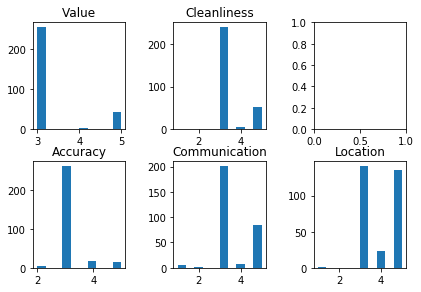

In [24]:
##check distribution of manually labelled aspect scores (may have>1 per review)
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(2, 3)
fig.tight_layout()

ax[0, 0].hist(absa_score_plot["value_merged"]) #row=0, col=0
ax[0, 0].set_title('Value')
ax[1, 0].hist(absa_score_plot["accuracy_merged"]) #row=2, col=1
ax[1 ,0].set_title('Accuracy')
ax[0, 1].hist(absa_score_plot["clean_merged"]) #row=0, col=1
ax[0, 1].set_title('Cleanliness')
ax[1, 1].hist(absa_score_plot["communicate_merged"]) #row=1, col=1
ax[1, 1].set_title('Communication')
ax[1, 2].hist(absa_score_plot["location_merged"]) #row=1, col=2
ax[1 ,2].set_title('Location')
plt.show()
#plt.savefig('prelim_SABSA_scores.png')

Few commented about value, communication
Most high reviews for location (positive skew)
Some negative reviews for accuracy (score 2)

In [25]:
#keep only those with aspect term
absa_subset = absa_merged.dropna(subset=['aspect_term'])
absa_subset

,S/N,In-charge,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_stopwordsrm,comments_stopwordsrm_lemma,aspect_category,aspect_term,id2merge,aspect_score
1,2,SX,50319142,574451000000000000,2022-03-03,81633638,Christophe,Super happy with this stylish and comfy apartm...,super happy stylish comfy apartment family eas...,super happy stylish comfy apartment family eas...,accuracy_merged,amenities great,574451000000000000_accuracy,5
2,3,SX,272282,52814653,2015-11-02,8528459,Rebecca,Mar made us feel very welcomed with great dire...,mar made us feel welcomed great directions gue...,mar make -PRON- feel welcome great direction g...,accuracy_merged,bathrooms well equipped,52814653_accuracy,4
3,4,SX,4683548,475841000000000000,2021-10-18,190705793,Ron,Andres is an amazing host! <br/>Not only the a...,andres amazing host not apartment see pictures...,andres amazing host not apartment see picture ...,accuracy_merged,pictures see,475841000000000000_accuracy,5
5,6,SX,2376434,84304799,2016-07-06,24048974,Aude,The apartment was exactly has describe. Large ...,the apartment exactly describe large enough fa...,the apartment exactly describe large enough fa...,accuracy_merged,apartment exactly,84304799_accuracy,5
8,9,SX,13009615,132485793,2017-02-18,44160525,Leonardo,"Nice beautiful place , very clean and tidy , g...",nice beautiful place clean tidy great location...,nice beautiful place clean tidy great location...,accuracy_merged,boiler small,132485793_accuracy,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,294,LT,1735947,252397945,2018-04-10,89131941,Leslie,The Gracia district is great! The plaza below...,the gracia district great the plaza provided m...,the gracia district great the plaza provide mu...,location_merged,district great,252397945_location,5
1494,295,LT,23265494,403617007,2019-01-21,69498100,Jasmin,Outstanding host with great amenities - centra...,outstanding host great amenities centrally loc...,outstanding host great amenity centrally locat...,location_merged,located centrally,403617007_location,5
1496,297,LT,5645973,304396739,2018-08-09,164747779,Arielle,We had a wonderful time in Barcelona! <br/>The...,we wonderful time barcelona the apartment pret...,wonderful time barcelona the apartment pretty...,location_merged,location good,304396739_location,4
1497,298,LT,23233260,451844194,2019-05-12,242067326,Sophie,"Beautifully modern and stylish apartment, nice...",beautifully modern stylish apartment nice sepa...,beautifully modern stylish apartment nice sepa...,location_merged,location central,451844194_location,5


In [140]:
##see how many of each aspect category there are among labelled samples 
#absa_subset: drop where aspect_term is None (not found)
#absa_term_plot = absa_subset.pivot(columns = 'aspect_category', values = 'aspect_term')

In [26]:
absa_term_plot = absa_subset.groupby('aspect_category')['id'].nunique().reset_index()
absa_term_plot

,aspect_category,id
0,accuracy_merged,36
1,clean_merged,56
2,communicate_merged,100
3,location_merged,167
4,value_merged,43


In [27]:
#clean abit!
import re
absa_term_plot['aspect_category'] = [re.sub('_merged', '', x) for x in absa_term_plot['aspect_category']]

In [28]:
absa_term_plot.sort_values(by='id')

,aspect_category,id
0,accuracy,36
4,value,43
1,clean,56
2,communicate,100
3,location,167


In [29]:
absa_merged.columns

Index(['S/N', 'In-charge', 'listing_id', 'id', 'date', 'reviewer_id',
       'reviewer_name', 'comments', 'comments_stopwordsrm',
       'comments_stopwordsrm_lemma', 'aspect_category', 'aspect_term',
       'id2merge', 'aspect_score'],
      dtype='object')

In [30]:
##Brute force convert!
def score2polarity(row):
    if row.aspect_score>3:
        return 'postive'
    elif row.aspect_score==3:
        return 'neutral'
    elif row.aspect_score<3:
        return 'negative'
    else:
        return None
absa_merged['polarity']= absa_merged.apply(score2polarity, axis =1)
#subset only columns needed (ACD, ASC)
M1_ABSA = absa_merged[['polarity', 'aspect_term', 'aspect_category', 'id2merge', 'id', 'aspect_score']]

In [31]:
#export (not done)
M1_ABSA #long form: 300*5 each sample against all 5 aspects (default score is 3)

,polarity,aspect_term,aspect_category,id2merge,id,aspect_score
0,neutral,None,accuracy_merged,208136450_accuracy,208136450,3
1,postive,amenities great,accuracy_merged,574451000000000000_accuracy,574451000000000000,5
2,postive,bathrooms well equipped,accuracy_merged,52814653_accuracy,52814653,4
3,postive,pictures see,accuracy_merged,475841000000000000_accuracy,475841000000000000,5
4,neutral,None,accuracy_merged,192308789_accuracy,192308789,3
...,...,...,...,...,...,...
1495,neutral,None,location_merged,623526283_location,623526283,3
1496,postive,location good,location_merged,304396739_location,304396739,4
1497,postive,location central,location_merged,451844194_location,451844194,5
1498,postive,location convenient,location_merged,195374111_location,195374111,4


In [32]:
absa.columns #wideform

Index(['S/N', 'In-charge', 'listing_id', 'id', 'date', 'reviewer_id',
       'reviewer_name', 'comments', 'comments_stopwordsrm',
       'comments_stopwordsrm_lemma', 'accuracy_entity', 'accuracy_aspect',
       'accuracy_score', 'clean_entity', 'clean_aspect', 'clean_score',
       'communicate_entity', 'communicate_aspect', 'communicate_score',
       'value_entity', 'value_aspect', 'value_score', 'location_entity',
       'location_aspect', 'location_score', 'Category', 'Sentiment',
       'accuracy_merged', 'clean_merged', 'communicate_merged', 'value_merged',
       'location_merged'],
      dtype='object')

In [ ]:
##merge the columns from absa back in to validate again? (longform)
#merge on id

In [33]:
M1_ABSA_merged = pd.merge(M1_ABSA, absa[['id','comments', 'comments_stopwordsrm',
       'comments_stopwordsrm_lemma']], 'left', left_on='id', right_on='id')
#M1_ABSA_merged.to_csv('M1_ABSA_merged.csv', index = False)

In [35]:
#how many distinct aspect-term-categories are there? Filter top ones high quality?
M1_ABSA_summary = M1_ABSA_merged.groupby(['aspect_category', 'aspect_term'])['id'].nunique().sort_values(ascending = False).reset_index()
M1_ABSA_summary

,aspect_category,aspect_term,id
0,location_merged,location great,30
1,clean_merged,apartment clean,17
2,location_merged,location good,11
3,clean_merged,place clean,11
4,location_merged,location central,8
...,...,...,...
244,location_merged,apartment very close,1
245,location_merged,apartment situated,1
246,location_merged,apartment location,1
247,location_merged,apartment good located,1


In [36]:
M1_ABSA_summary[M1_ABSA_summary['id']>=5]

,aspect_category,aspect_term,id
0,location_merged,location great,30
1,clean_merged,apartment clean,17
2,location_merged,location good,11
3,clean_merged,place clean,11
4,location_merged,location central,8
5,location_merged,location excellent,8
6,location_merged,location amazing,7
7,location_merged,location perfect,7
8,communicate_merged,host helpful,6
9,location_merged,metro close,5


In [37]:
#clean up abit before exporting!
M1_ABSA_summary['aspect_category'] = [re.sub('_merged','', x) for x in M1_ABSA_summary['aspect_category']]

In [42]:
M1_ABSA_summary.rename(columns = {'id':'mentions'}, inplace = True)
M1_ABSA_summary

,aspect_category,aspect_term,mentions
0,location,location great,30
1,clean,apartment clean,17
2,location,location good,11
3,clean,place clean,11
4,location,location central,8
...,...,...,...
244,location,apartment very close,1
245,location,apartment situated,1
246,location,apartment location,1
247,location,apartment good located,1


### Filtered output from labelled data: M1_ABSA_summary (249/300)

In [43]:
#M1_ABSA_summary.to_csv('M1_ABSA_summary.csv')

## Recap and complete M1 noisy labelling

In [46]:
##load all reviews
df = pd.read_csv('cleaned_reviews_prelim_v2.csv')

/Users/leesixian/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
df.shape

(395340, 9)

In [176]:
df.head()

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_stopwordsrm,comments_stopwordsrm_lemma
0,0,18674,4808211,2013-05-27,4841196.0,Caron,"Great location. Clean, spacious flat. Would re...",great location clean spacious flat would recom...,great location clean spacious flat would recom...
1,2,18674,41087522,2015-08-04,35231385.0,Shlomi,"Big apartment, well equipped.\r<br/>Very good ...",big apartment well equipped very good service ...,big apartment well equip very good service exc...
2,3,18674,81000756,2016-06-20,23223644.0,Joost,The Check in was fast and flexible. The price ...,the check fast flexible the price fair flat is...,the check fast flexible the price fair flat is...
3,4,18674,278588962,2018-06-18,4756672.0,Marius,Great location and enough space in the apartme...,great location enough space apartment people a...,great location enough space apartment people a...
4,5,18674,408388148,2019-02-04,118847863.0,Sonora,Our experience here was mixed. <br/>The locati...,our experience mixed the location flat super c...,-PRON- experience mix the location flat super ...


In [261]:
distinct_reviews_per_listing = df.groupby(['listing_id'])['id'].count()

In [262]:
max(distinct_reviews_per_listing)

538

In [263]:
min(distinct_reviews_per_listing)

1

In [ ]:
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn

 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from afinn import Afinn
 
#nlp = en_core_web_lg.load()
af = Afinn()
senti = SentimentIntensityAnalyzer()
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from nltk.corpus import stopwords
stopwords_list = set(stopwords.words("english"))
punctuations = """!()-![]{};:,+'"\,<>./?@#$%^&*_~Â""" #List of punctuation to remove
def reviewParse(review):
    '''sentence level parsing'''
    if type(review)==str:
        review = re.sub('<br/>|<br/>|\r', '',review)
        splitReview = review.split() #Split the review into words
        #print('cleaned symbols')
        parsedReview = " ".join([word.translate(str.maketrans('', '', punctuations)) + " " for word in splitReview]) #Takes the stubborn punctuation out
    else:
        parsedReview = review
    return parsedReview #Returns the parsed review
  
def clean_review(review):
    '''sentence level cleaning'''
    clean_words = []
    if type(review)==str:
        splitReview = review.split()
        for w in splitReview:
            if w.isalpha() and w not in stopwords_list:
                clean_words.append(w.lower())
        clean_review = " ".join(clean_words)
    else:
        clean_review = review
    return clean_review

In [ ]:
#Parse all the reviews for their punctuation and add it into a new column
#cleaned_reviews['comments_sent_stopwordsrm'] = 
from nltk.tokenize import sent_tokenize, word_tokenize
from tqdm import tqdm
review_sent_parsed = []
review_sent_cleaned = []
for review in tqdm(df['comments']):
    sent_in_review = sent_tokenize(str(review)) #list of sentence
    sentlist = []
    sentlist2= []
    for sent in sent_in_review: #list of words in sentence
        out = reviewParse(sent)
        out2 = clean_review(out)
        sentlist.append(out) 
        sentlist2.append(out2)
    review_sent_parsed.append(sentlist)
    review_sent_cleaned.append(sentlist2)
df['sent_split_parsed'] = review_sent_parsed
df['sent_split_cleaned'] = review_sent_cleaned

## Perform POS-tagging to identify noun/adj -> map aspect
Go thru corpus, split sentence up, assign each sentence to one of the labels based on match with top N keywords 

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

In [ ]:
sentence='The host is very friendly'

token = nltk.word_tokenize(sentence)
after_tagging = nltk.pos_tag(token)
print(token)
print(after_tagging)

In [ ]:
def penn_to_wn(tag):
    """
    Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [ ]:
sentiment = 0.0
tokens_count = 0

lemmatizer = WordNetLemmatizer()
for word, tag in after_tagging:
    wn_tag = penn_to_wn(tag)
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        continue

    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        continue

    synsets = wn.synsets(lemma, pos=wn_tag)
    if not synsets:
        continue

    # Take the first sense, the most common
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())
    print(swn_synset)

    sentiment += swn_synset.pos_score() - swn_synset.neg_score()
    tokens_count += 1
print (sentiment)

In [ ]:
def sentence2sentiment(sent):
    '''given text sentence, output POS tag, sentiment '''
    token = nltk.word_tokenize(sent)
    after_tagging = nltk.pos_tag(token) #tokenise words -> POS tag
    sentiment = 0.0
    noun = ''
    adj = ''
    lemmatizer = WordNetLemmatizer()
    #iterate through EACH word in sent
    #assume that there is ONLY one adj adn
    for word, tag in after_tagging:
        #key = pair of (N, A) or (A,N)
        #create a tuple pair of nearest (n,a) or (a,n)
        wn_tag = penn_to_wn(tag)
        if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
            continue
            
        if noun!='' and adj!='':
            #find the sentiment related to the noun-adj pair
            #print(f'noun: {noun}; adj: {adj}')
            break
        
        elif wn_tag == 'n' and noun=='':
            noun += word
            #print(noun , "found")
        elif wn_tag == 'a' and adj=='':
            adj += word
            #print(adj , "found")
           
        lemma = lemmatizer.lemmatize(word, pos=wn_tag)
        if not lemma:
            continue

        synsets = wn.synsets(lemma, pos=wn_tag)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        #print(swn_synset) #this is to check/ validate sentiment score

        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        
    if noun!='' and adj!='':
        return (noun, adj, sentiment)
    else: 
        return ('', '', '')

In [ ]:
test  = df['sent_split_cleaned'][9][0] #first sentence of review 9
test

In [ ]:
sentence2sentiment(test)

In [ ]:
df.columns

In [ ]:
parsed_reviews

In [ ]:
#for each review
    #for each sentence
        #do POS tagging
        #do sentiment tagging
review_to_POS = []
#create a list of review_id | sentence_id | noun |adj |sentiment
parsed_reviews = df['sent_split_parsed']#[:100]
for review_id, review in tqdm(enumerate(parsed_reviews)):
    for sentence_id, sent in enumerate(review):
        noun, adj, senti = sentence2sentiment(sent)
        noun = noun.lower()
        adj = adj.lower()
        review_to_POS.append([review_id, sentence_id, noun, adj, senti])

In [ ]:
review_to_POS = pd.DataFrame(review_to_POS, 
                             columns = ['review_id', 'sentence_id', 'noun','adj', 'sentiment'])

In [ ]:
df['id'] #this is the sentence id to match!

In [ ]:
sent_id_map = {}
for idx, x in enumerate(df['id']):
    sent_id_map[idx] = x

In [ ]:
review_to_POS['id'] = [sent_id_map[x] for x in review_to_POS['review_id']]

In [ ]:
review_to_POS.head()

In [ ]:
#export! takes super long to run so pls dont redo!
import csv
#review_to_POS.to_csv('review_to_POS.csv' ,sep=",",quotechar='"',index=False,
            #quoting=csv.QUOTE_ALL)

In [44]:
review_to_POS = pd.read_csv('review_to_POS.csv')

/Users/leesixian/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
review_to_POS.head()

,review_id,sentence_id,noun,adj,sentiment,id
0,0,0,NaN,NaN,NaN,4808211
1,0,1,clean,spacious,0.000,4808211
2,0,2,NaN,NaN,NaN,4808211
3,1,0,apartment,big,0.125,41087522
4,1,1,service,good,0.750,41087522


In [50]:
df[df['id']=='41087522']['comments_stopwordsrm']

1    big apartment well equipped very good service ...
Name: comments_stopwordsrm, dtype: object

## For the given noun-adj identified, try to find match with top N to map the aspect

In [2]:
#continue
import pandas as pd
review_to_POS = pd.read_csv('review_to_POS.csv')

/Users/leesixian/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
##try to match the detected noun or adj to the aspect keywords to detect category
#df_aspect = pd.read_csv('aspect_df_v2.csv') #long form
df_aspect_wide_w2v = pd.read_csv('aspect_df_w2v_wide.csv') #wide form
df_aspect_wide_glove = pd.read_csv('aspect_df_glove_wide.csv') #wide form
df_aspect_wide_merge = pd.concat([df_aspect_wide_w2v, df_aspect_wide_glove])

In [4]:
df_aspect_wide_w2v.head(n=5)

,accuracy,clean,communicate,value,location,checkin
0,advertising,spotless,contact,valua,position,check
1,status,comfertabel,communicating,valye,localization,checkincheckout
2,judging,whirpool,comunicate,valu,locations,checking
3,inaccurate,accessories,communication,save,neighborhood,checkinout
4,reflected,neat,acces,extort,locale,arrival


In [5]:
df_aspect_wide_glove.head()

,accuracy,clean,communicate,value,location,checkin
0,accuracy,clean,communicate,value,location,checkin
1,reliability,enough,communicating,price,locations,coolin
2,measurement,cleaning,communicated,values,vicinity,stickin
3,accurate,ensure,interact,valued,adjacent,missin
4,effectiveness,put,convey,interest,site,hatin


In [6]:
df_aspect_wide_merge.head()

,accuracy,clean,communicate,value,location,checkin
0,advertising,spotless,contact,valua,position,check
1,status,comfertabel,communicating,valye,localization,checkincheckout
2,judging,whirpool,comunicate,valu,locations,checking
3,inaccurate,accessories,communication,save,neighborhood,checkinout
4,reflected,neat,acces,extort,locale,arrival


In [7]:
df_aspect_wide_merge.shape

(200, 6)

In [52]:
aspect_seedwords = df_aspect_wide_w2v.columns.tolist()

In [45]:
aspect_seedwords

['accuracy', 'clean', 'communicate', 'value', 'location', 'checkin']

In [50]:
df_aspect_wide_w2v.loc[len(df_aspect_wide_w2v)] = aspect_seedwords

In [51]:
df_aspect_wide_w2v #extended!

,accuracy,clean,communicate,value,location,checkin
0,advertising,spotless,contact,valua,position,check
1,status,comfertabel,communicating,valye,localization,checkincheckout
2,judging,whirpool,comunicate,valu,locations,checking
3,inaccurate,accessories,communication,save,neighborhood,checkinout
4,reflected,neat,acces,extort,locale,arrival
...,...,...,...,...,...,...
96,displayed,unspecific,solve,negativity,davantage,checkouts
97,utter,bedroomsa,readingmediation,uberversion,seesuper,outbreaks
98,represent,dede,imprinted,pricy,sleepshower,bedswith
99,tendency,cleanunfortunately,slightlylate,experinece,part,howwhere


In [9]:
review_to_POS.iloc[1].noun

'clean'

In [10]:
review_to_POS.iloc[1].adj

'spacious'

In [89]:
test = review_to_POS[:10]

In [90]:
test 

,review_id,sentence_id,noun,adj,sentiment,id,ACD_w2v
0,0,0,NaN,NaN,NaN,4808211,None
1,0,1,clean,spacious,0.000,4808211,None
2,0,2,NaN,NaN,NaN,4808211,None
3,1,0,apartment,big,0.125,41087522,None
4,1,1,service,good,0.750,41087522,None
5,1,2,NaN,NaN,NaN,41087522,None
6,2,0,check,fast,0.000,81000756,None
7,2,1,price,fair,0.625,81000756,None
8,2,2,time,hot,0.000,81000756,None
9,2,3,airbnb,second,0.000,81000756,None


In [91]:
df_aspect_wide = df_aspect_wide_w2v

In [92]:
test.shape

(10, 7)

In [93]:
df_aspect_wide['clean']

0                spotless
1             comfertabel
2                whirpool
3             accessories
4                    neat
              ...        
96             unspecific
97              bedroomsa
98                   dede
99     cleanunfortunately
100                 clean
Name: clean, Length: 101, dtype: object

In [94]:
'clean' in list(df_aspect_wide['clean'])

True

In [95]:
df_aspect_wide['clean'][100]

'clean'

In [96]:
type(df_aspect_wide['clean'][100])

str

In [97]:
for i in range(len(test)):
    #to avoid getting the most prevalant category all the time....
    #try the least common first > most common
    row = test.iloc[i][:]
    #print(row.noun)
    #print(row.adj)
    if (row.noun in list(df_aspect_wide['value'])) or (row.adj in list(df_aspect_wide['value'])):
        print(i, row.noun, row.adj, "value")
        #return 'value'
    elif row.noun in list(df_aspect_wide['accuracy']) or row.adj in list(df_aspect_wide['accuracy']):
        print(i, row.noun, row.adj, "accuracy")
        #return 'accuracy'
    elif row.noun in list(df_aspect_wide['communicate']) or row.adj in list(df_aspect_wide['communicate']):
        print(i, row.noun, row.adj, "communicate")
        #return 'communciate'
    elif (row.noun in list(df_aspect_wide['clean'])) or (row.adj in list(df_aspect_wide['clean'])):
        print(i, row.noun, row.adj, "clean")
        #return 'clean'
    elif row.noun in list(df_aspect_wide['location']) or row.adj in list(df_aspect_wide['location']):
        print(i, row.noun, row.adj, "location")
        #return 'location'
    else:
        print(i, row.noun, row.adj,'not found!')

0 nan nan not found!
1 clean spacious clean
2 nan nan not found!
3 apartment big not found!
4 service good not found!
5 nan nan not found!
6 check fast communicate
7 price fair not found!
8 time hot not found!
9 airbnb second not found!


In [98]:
def match_topn_aspect(row, df_aspect_wide):
    ''''''
    #to avoid getting the most prevalant category all the time....
    #try the least common first > most common
    #print(row.noun)
    #print(row.adj)
    if (row.noun in list(df_aspect_wide['value'])) or (row.adj in list(df_aspect_wide['value'])):
        #print(i, row.noun, row.adj, "value")
        return 'value'
    elif row.noun in list(df_aspect_wide['accuracy']) or row.adj in list(df_aspect_wide['accuracy']):
        #print(i, row.noun, row.adj, "accuracy")
        return 'accurate' #corrected typo
    elif row.noun in list(df_aspect_wide['communicate']) or row.adj in list(df_aspect_wide['communicate']):
        #print(i, row.noun, row.adj, "communicate")
        return 'communiciate'
    elif (row.noun in list(df_aspect_wide['clean'])) or (row.adj in list(df_aspect_wide['clean'])):
        #print(i, row.noun, row.adj, "clean")
        return 'cleanliness' #corrected typo
    elif row.noun in list(df_aspect_wide['location']) or row.adj in list(df_aspect_wide['location']):
        #print(i, row.noun, row.adj, "location")
        return 'location'
    else:
        #print(i, row.noun, row.adj,'not found!')
        return None

In [103]:
from tqdm import tqdm
tqdm.pandas()
test_out = test.progress_apply(match_topn_aspect, df_aspect_wide = df_aspect_wide_w2v, axis = 1)

100%|██████████| 10/10 [00:00<00:00, 1570.84it/s]


In [104]:
from collections import Counter
Counter(test_out) #list

Counter({None: 8, 'clean': 1, 'communciate': 1})

In [105]:
#takes quite long.....
from tqdm import tqdm
tqdm.pandas()
review_to_POS['ACD_w2v']= review_to_POS.progress_apply(match_topn_aspect, df_aspect_wide = df_aspect_wide_w2v, axis = 1)

100%|██████████| 1568264/1568264 [08:11<00:00, 3192.13it/s]


In [106]:
review_to_POS['ACD_w2v'].value_counts() #mostly None? 

location       91437
clean          74577
communciate    23067
value           5803
accuracy        2022
Name: ACD_w2v, dtype: int64

In [107]:
#repeat for glove! (if not found for W2V dictionary try glove)
#takes quite long.....
from tqdm import tqdm
tqdm.pandas()
review_to_POS['ACD_glove']= review_to_POS.progress_apply(match_topn_aspect, df_aspect_wide = df_aspect_wide_glove, axis = 1)

100%|██████████| 1568264/1568264 [08:55<00:00, 2929.23it/s]


In [108]:
#repeat for both (not necessary, can just if w2v none use glove else none)
#takes quite long.....
from tqdm import tqdm
tqdm.pandas()
review_to_POS['ACD_merged']= review_to_POS.progress_apply(match_topn_aspect, df_aspect_wide = df_aspect_wide_merge, axis = 1)

100%|██████████| 1568264/1568264 [10:41<00:00, 2443.78it/s]


In [109]:
import csv
review_to_POS.to_csv('review_to_POS_ACD.csv' ,sep=",",quotechar='"',index=False,
            quoting=csv.QUOTE_ALL)

In [110]:
review_to_POS.head()

,review_id,sentence_id,noun,adj,sentiment,id,ACD_w2v,ACD_glove,ACD_merged
0,0,0,NaN,NaN,NaN,4808211,None,None,None
1,0,1,clean,spacious,0.000,4808211,clean,clean,clean
2,0,2,NaN,NaN,NaN,4808211,None,None,None
3,1,0,apartment,big,0.125,41087522,None,None,None
4,1,1,service,good,0.750,41087522,None,clean,clean


In [202]:
review_to_POS.shape

(1568264, 9)

In [200]:
#drop NAN
review_to_POS_dropna = review_to_POS.dropna(subset=['sentiment', 'ACD_merged'])

In [201]:
review_to_POS_dropna.shape

(414472, 9)

(array([1.80000e+01, 1.37000e+02, 1.86400e+03, 2.62310e+04, 1.66134e+05,
        1.74912e+05, 4.19410e+04, 3.11900e+03, 1.10000e+02, 6.00000e+00]),
 array([-2.75, -2.15, -1.55, -0.95, -0.35,  0.25,  0.85,  1.45,  2.05,
         2.65,  3.25]),
 <a list of 10 Patch objects>)

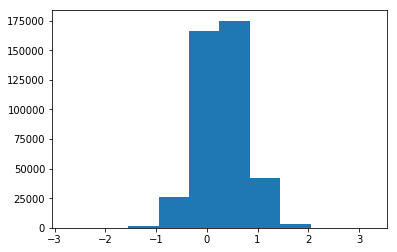

In [203]:
##convert sentiment to scale of 1 to 5 (currently -3 to 3)
import matplotlib.pyplot as plt
plt.hist(review_to_POS_dropna['sentiment'])
plt.show()

In [204]:
max(review_to_POS_dropna['sentiment'])

3.25

In [205]:
min(review_to_POS_dropna['sentiment'])

-2.75

In [206]:
max(review_to_POS_dropna['sentiment'])-min(review_to_POS_dropna['sentiment'])

6.0

In [217]:
## do min max normalisation to [1,5]
def minmaxscale(x, a=1, b=5, mmin = 0, mmax=1):
    x_new = a+((x-mmin)*(b-a)/(mmax-mmin))
    return x_new

In [218]:
minmaxscale(-2.75, mmin=-2.75, mmax=3.25)

1.0

In [219]:
minmaxscale(3.25, mmin=-2.75, mmax=3.25)

5.0

In [221]:
rescaled = []
mmin = min(review_to_POS_dropna['sentiment'])
mmax = max(review_to_POS_dropna['sentiment'])
for x in tqdm(review_to_POS_dropna['sentiment']):
    x_new = minmaxscale(x, mmin = mmin, mmax= mmax)
    rescaled.append(x_new)

100%|██████████| 414472/414472 [00:00<00:00, 897656.16it/s]


(array([1.80000e+01, 1.37000e+02, 1.86400e+03, 2.62310e+04, 1.66134e+05,
        1.74912e+05, 4.19410e+04, 3.11900e+03, 1.10000e+02, 6.00000e+00]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

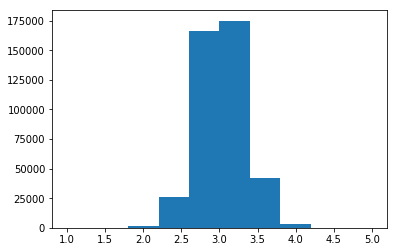

In [222]:
import matplotlib.pyplot as plt
plt.hist(rescaled)
plt.show()

In [223]:
review_to_POS_dropna['sentiment_rescaled'] = rescaled

/Users/leesixian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [227]:
review_to_POS_dropna.shape

(414472, 10)

In [224]:
#export!
review_to_POS_dropna.to_csv('review_to_POS_dropna.csv', index = False)

In [229]:
## aggregate to review-level (from sentence-level)
sent_count_per_review = review_to_POS_dropna.groupby(['review_id'])['sentence_id'].count()

(array([2.46248e+05, 1.08470e+04, 4.68000e+02, 3.00000e+01, 2.00000e+00]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. ]),
 <a list of 5 Patch objects>)

Text(0.5, 1.0, 'Histogram of sentence count per review')

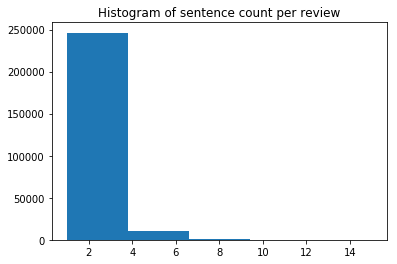

In [231]:
import matplotlib.pyplot as plt
plt.hist(sent_count_per_review, bins=5)
plt.title('Histogram of sentence count per review')
plt.show()

In [158]:
## Are there multiple categories for ONE review?
#review_to_POS_subset = review_to_POS.dropna(subset = ['ACD_merged'])

In [232]:
aspect_count_per_review = review_to_POS_dropna.groupby(['id'])['ACD_merged'].nunique()
aspect_count_per_review

id
155565231    1
155967373    2
157270461    1
157280064    1
157542221    1
            ..
99987043     1
99988760     1
99992172     1
9999874      2
99999684     1
Name: ACD_merged, Length: 257595, dtype: int64

In [233]:
Counter(aspect_count_per_review)

Counter({1: 185768, 2: 62047, 3: 9071, 4: 682, 5: 27})

In [234]:
aspect_count_per_review[aspect_count_per_review>1].sort_values(ascending = False)

id
450469395493812903    5
713395395             5
514945275             5
334087360             5
40127400              5
                     ..
397570883771726963    2
397560885699326033    2
397536447747361195    2
39745054              2
155967373             2
Name: ACD_merged, Length: 71827, dtype: int64

In [235]:
review_to_POS_dropna.columns

Index(['review_id', 'sentence_id', 'noun', 'adj', 'sentiment', 'id', 'ACD_w2v',
       'ACD_glove', 'ACD_merged', 'sentiment_rescaled'],
      dtype='object')

In [236]:
#output predicted aspect for each review - one review can have multiple aspects
review_aspect_score_w2v = review_to_POS_dropna.groupby(['id', 'ACD_w2v'])['sentiment_rescaled'].sum()

In [237]:
#this is the number of sentence in a review X aspect
review_aspect_cnt = review_to_POS_dropna.groupby(['id', 'ACD_w2v'])['ACD_w2v'].count()

In [238]:
from collections import Counter 
Counter(review_aspect_cnt) #per review X aspect sentence counts

Counter({1: 178040, 2: 8635, 3: 487, 4: 28, 6: 3, 5: 1})

In [240]:
review_aspect_avg = review_aspect_score_w2v/review_aspect_cnt

In [241]:
review_aspect_df = review_aspect_cnt.index.to_frame()#.columns#.rename({'aspect_x':'sent_cnt'})

In [242]:
review_aspect_df.reset_index(drop=True)

,id,ACD_w2v
0,155565231,clean
1,155967373,clean
2,155967373,location
3,157270461,clean
4,157280064,communciate
...,...,...
187189,99980628,location
187190,99984993,location
187191,99992172,location
187192,9999874,clean


In [243]:
review_aspect_df['avg_score'] = review_aspect_avg

In [244]:
review_aspect_df.head()

id      ACD_w2v  avg_score
id        ACD_w2v                                       
155565231 clean        155565231        clean   2.916667
155967373 clean        155967373        clean   2.916667
          location     155967373     location   3.666667
157270461 clean        157270461        clean   3.083333
157280064 communciate  157280064  communciate   2.666667

In [245]:
review_aspect_df.columns

Index(['id', 'ACD_w2v', 'avg_score'], dtype='object')

In [246]:
##export!
review_aspect_df.to_csv('review_aspect_df_w2v_all.csv', index = False)

In [247]:
review_aspect_df

id      ACD_w2v  avg_score
id        ACD_w2v                                       
155565231 clean        155565231        clean   2.916667
155967373 clean        155967373        clean   2.916667
          location     155967373     location   3.666667
157270461 clean        157270461        clean   3.083333
157280064 communciate  157280064  communciate   2.666667
...                          ...          ...        ...
99980628  location      99980628     location   2.833333
99984993  location      99984993     location   3.083333
99992172  location      99992172     location   2.916667
9999874   clean          9999874        clean   2.916667
          location       9999874     location   3.416667

[187194 rows x 3 columns]

In [248]:
review_aspect_df['ACD_w2v'].unique()

array(['clean', 'location', 'communciate', 'value', 'accuracy'],
      dtype=object)

In [253]:
##Post editing to correct for typos

In [249]:
#review_aspect_df['ACD_w2v']
review_aspect_df['ACD_w2v'] = [re.sub('clean', 'cleanliness', x) for x in review_aspect_df['ACD_w2v']]

In [250]:
review_aspect_df['ACD_w2v'].unique()

array(['cleanliness', 'location', 'communciate', 'value', 'accuracy'],
      dtype=object)

In [251]:
review_aspect_df['ACD_w2v'] = [re.sub('accuracy', 'accurate', x) for x in review_aspect_df['ACD_w2v']]

In [252]:
review_aspect_df['ACD_w2v'].unique()
#array(['location', 'communicate', 'cleanliness', 'accurate', 'value'])

array(['cleanliness', 'location', 'communciate', 'value', 'accurate'],
      dtype=object)

In [255]:
review_aspect_df['ACD_w2v'] = [re.sub('communciate', 'communicate', x) for x in review_aspect_df['ACD_w2v']]

In [256]:
review_aspect_df['ACD_w2v'].unique()

array(['cleanliness', 'location', 'communicate', 'value', 'accurate'],
      dtype=object)

In [257]:
##reexport!
#review_aspect_df.to_csv('review_aspect_df_w2v_all_relab.csv', index = False)

In [205]:
#export all the clean reviews
df.columns

Index(['Unnamed: 0', 'listing_id', 'id', 'date', 'reviewer_id',
       'reviewer_name', 'comments', 'comments_stopwordsrm',
       'comments_stopwordsrm_lemma'],
      dtype='object')

In [206]:
df['id'][0]

'4808211'

## Output predictions for benchmarking

In [187]:
#filter only one review one aspect + sentiment
#output predictions for selected test samples (300)
#get the review id for the 300 samples
testidx = absa['id']
absa.columns

Index(['S/N', 'In-charge', 'listing_id', 'id', 'date', 'reviewer_id',
       'reviewer_name', 'comments', 'comments_stopwordsrm',
       'comments_stopwordsrm_lemma', 'accuracy_entity', 'accuracy_aspect',
       'accuracy_score', 'clean_entity', 'clean_aspect', 'clean_score',
       'communicate_entity', 'communicate_aspect', 'communicate_score',
       'value_entity', 'value_aspect', 'value_score', 'location_entity',
       'location_aspect', 'location_score', 'Category', 'Sentiment',
       'accuracy_merged', 'clean_merged', 'communicate_merged', 'value_merged',
       'location_merged'],
      dtype='object')

In [168]:
absa['Category'].value_counts()

location       127
communicate     75
value           52
cleanliness     35
accurate        11
Name: Category, dtype: int64

In [169]:
absa['Sentiment'].value_counts()

positive    288
neutral       7
negative      5
Name: Sentiment, dtype: int64

In [246]:
review_aspect_df = pd.read_csv('review_aspect_df_w2v_all_relab.csv')

In [170]:
review_aspect_df.columns

Index(['id', 'ACD_w2v', 'avg_score'], dtype='object')

In [171]:
review_aspect_df.shape

(187194, 3)

In [172]:
review_aspect_df['id'].nunique()

156414

In [173]:
review_aspect_df.groupby(['id'])['id'].count().sort_values(ascending = False)

id
563552947             4
290385227             4
596992940             4
524487784790631874    4
137422704             4
                     ..
466351960             1
466357195             1
466357338             1
466361378             1
110535                1
Name: id, Length: 156414, dtype: int64

In [174]:
review_aspect_df[review_aspect_df['id']==563552947]

,id,ACD_w2v,avg_score
162984,563552947,accurate,2.833333
162985,563552947,cleanliness,2.833333
162986,563552947,location,3.208333
162987,563552947,value,2.916667


In [67]:
df[df['id']=='563552947']

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_stopwordsrm,comments_stopwordsrm_lemma
246985,356924,14178375,563552947,2019-11-13,14679572.0,Edgar,"Not a good value. Noise is a very big issue, w...",not good value noise big issue stayed nights g...,not good value noise big issue stay night good...


In [204]:
df.shape

(395340, 9)

In [122]:
# to see the output in full
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)

In [72]:
with pd.option_context('display.max_colwidth', None):
    display(df[df['id']=='563552947']['comments'])

246985    Not a good value. Noise is a very big issue, we stayed 4 nights and did not have a good nights rest. I understand it is a historic and busy location, however the walls are paper thin and near impossible to sleep comfortably because you hear everything. The apartment is dated from what is representative in the photos. Not sure if it was just our stay as all others on here say it was sparkling, but the apartment bedroom and bathroom was NOT clean. Ceiling is missing in the bathroom for inspection ( we were told 4 days in advance by owner), which should be fixed soon. The entrance to the apartment also needs to be addressed. The washer and dryer were very easy to use. The kitchen and the common area were as depicted in the pictures. The location is good but its just not worth the value. The cleanliness and noise were our major issues. To travel so far for an underwhelming experience is so disappointing.
Name: comments, dtype: object

In [247]:
#takes awhile! (keep only largest avg_score of each review)
review_aspect_df_filter = review_aspect_df.loc[review_aspect_df.groupby(["id"])["avg_score"].idxmax()]   

In [248]:
review_aspect_df_filter.shape

(156414, 3)

In [249]:
review_aspect_df_filter.head()

,id,ACD_w2v,avg_score
54732,110535,cleanliness,2.916667
71832,164899,location,3.166667
72021,165406,location,3.041667
73074,168792,cleanliness,2.916667
81699,199839,cleanliness,2.916667


In [250]:
review_aspect_df_filter['id'].nunique()

156414

In [236]:
df.columns

Index(['Unnamed: 0', 'listing_id', 'id', 'date', 'reviewer_id',
       'reviewer_name', 'comments', 'comments_stopwordsrm',
       'comments_stopwordsrm_lemma'],
      dtype='object')

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395340 entries, 0 to 395339
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  395340 non-null  object 
 1   listing_id                  391546 non-null  object 
 2   id                          391546 non-null  object 
 3   date                        388937 non-null  object 
 4   reviewer_id                 388937 non-null  float64
 5   reviewer_name               388937 non-null  object 
 6   comments                    388912 non-null  object 
 7   comments_stopwordsrm        384457 non-null  object 
 8   comments_stopwordsrm_lemma  384457 non-null  object 
dtypes: float64(1), object(8)
memory usage: 27.1+ MB


In [237]:
df['id'][0]

'4808211'

In [251]:
review_aspect_df_filter['id'][0]

155565231

In [228]:
##convert int id to string
#review_aspect_df_merge_filter['id'] = [str(x) for x in review_aspect_df_merge_filter['id']]

In [252]:
def sentiment_vibe(score):
    if score > 2.5:
        return "positive"
    elif score <2.5:
        return 'negative'
    else:
        return 'neutral'

In [253]:
review_aspect_df_filter['sentiment']= review_aspect_df_filter['avg_score'].apply(sentiment_vibe)

In [254]:
#merge in columns from reviews df
reviewsdf2merge = df[['id','listing_id','comments', 'comments_stopwordsrm_lemma']]
#review_aspect_df_merge_filter = review_aspect_df_merge_filter.merge(reviewsdf2merge, on = 'id', how='left')

In [258]:
review_aspect_df_filter.shape

(156414, 4)

In [259]:
review_aspect_df_filter.head()

,id,ACD_w2v,avg_score,sentiment
54732,110535,cleanliness,2.916667,positive
71832,164899,location,3.166667,positive
72021,165406,location,3.041667,positive
73074,168792,cleanliness,2.916667,positive
81699,199839,cleanliness,2.916667,positive


In [260]:
review_aspect_df_filter['id'][0]

155565231

In [261]:
review_aspect_df_filter['id'] = [str(x) for x in review_aspect_df_filter['id']]

In [262]:
review_aspect_df_filter['id'][0]

'155565231'

In [270]:
df[df['id'].isin(['155565231'])]['comments_stopwordsrm_lemma']

Series([], Name: comments_stopwordsrm_lemma, dtype: object)

In [ ]:
df[df['id'].isin(['164899'])]['comments_stopwordsrm_lemma']

In [199]:
review_aspect_df_merge_filter2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156414 entries, 0 to 156413
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          156414 non-null  object 
 1   ACD_w2v                     156414 non-null  object 
 2   avg_score                   156414 non-null  float64
 3   listing_id                  50382 non-null   object 
 4   comments                    50382 non-null   object 
 5   comments_stopwordsrm_lemma  50382 non-null   object 
 6   sentiment                   156414 non-null  object 
dtypes: float64(1), object(6)
memory usage: 9.5+ MB


In [191]:
#test id to filter out from data_noisy
testidx[:10]

0             208136450
1    574451000000000000
2              52814653
3    475841000000000000
4             192308789
5              84304799
6             173246323
7             593244186
8             132485793
9              91321053
Name: id, dtype: int64

In [200]:
data_noisy_train = review_aspect_df_merge_filter2[~review_aspect_df_merge_filter2['id'].isin(testidx)]

In [201]:
data_noisy_test =review_aspect_df_merge_filter2[review_aspect_df_merge_filter2['id'].isin(testidx)]

In [164]:
#export!
import csv
#review_aspect_df_merge_filter.to_csv('review_aspect_df_merge_filter.csv',sep=",",quotechar='"',index=False,
            #quoting=csv.QUOTE_ALL)

In [202]:
data_noisy_train.to_csv('data_noisy_train.csv',sep=",",quotechar='"',index=False,
            quoting=csv.QUOTE_ALL)

In [203]:
data_noisy_test.to_csv('data_noisy_test.csv',sep=",",quotechar='"',index=False,
            quoting=csv.QUOTE_ALL)

In [92]:
#if there is multiple tags for one review, assign cat based on max score (strongest)
review_aspect_df300 = review_aspect_df[review_aspect_df['id'].isin([str(x) for x in id2filter])]
#.groupby(['id'])['avg_score'].max()

In [93]:
review_aspect_df300['id'].nunique() #the match rate is low! only 1/3

103

In [94]:
#do the tie breaker first!
#idx = review_aspect_df300.groupby(['id'])['avg_score'].transform(max) == review_aspect_df300['avg_score']
#idx
review_aspect_df300_filter = review_aspect_df300.loc[review_aspect_df300.groupby(["id"])["avg_score"].idxmax()]      
#review_aspect_df300_filter = review_aspect_df300.groupby(['id'])['avg_score'].max()

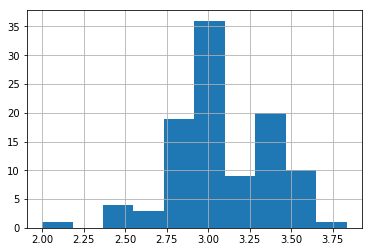

In [100]:
review_aspect_df300_filter['avg_score'].hist()

In [101]:
def sentiment_vibe(score):
    if score > 2.5:
        return "positive"
    elif score <2.5:
        return 'negative'
    else:
        return 'neutral'


##BASED ON SENTIWORDNET
review_aspect_df300_filter['sentiment']= review_aspect_df300_filter['avg_score'].apply(sentiment_vibe)

In [102]:
review_aspect_df300_filter.shape

(103, 4)

In [103]:
review_aspect_df300_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 144289 to 34233
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         103 non-null    int64  
 1   ACD_w2v    103 non-null    object 
 2   avg_score  103 non-null    float64
 3   sentiment  103 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 4.0+ KB


In [87]:
#convert to string
#review_aspect_df300_filter['id'] = [str(x) for x in review_aspect_df300_filter['id']]

In [105]:
review_aspect_df300_filter['ACD_w2v'].value_counts()

location       52
cleanliness    35
communicate    10
value           6
Name: ACD_w2v, dtype: int64

In [106]:
absa['Category'].value_counts()

location       127
communicate     75
value           52
cleanliness     35
accurate        11
Name: Category, dtype: int64

In [107]:
review_aspect_df300_filter['sentiment'].value_counts()

positive    98
neutral      4
negative     1
Name: sentiment, dtype: int64

In [108]:
absa['Sentiment'].value_counts()

positive    288
neutral       7
negative      5
Name: Sentiment, dtype: int64

In [109]:
review_aspect_df300_filter.columns

Index(['id', 'ACD_w2v', 'avg_score', 'sentiment'], dtype='object')

In [129]:
absa.columns

Index(['S/N', 'In-charge', 'listing_id', 'id', 'date', 'reviewer_id',
       'reviewer_name', 'comments', 'comments_stopwordsrm',
       'comments_stopwordsrm_lemma', 'accuracy_entity', 'accuracy_aspect',
       'accuracy_score', 'clean_entity', 'clean_aspect', 'clean_score',
       'communicate_entity', 'communicate_aspect', 'communicate_score',
       'value_entity', 'value_aspect', 'value_score', 'location_entity',
       'location_aspect', 'location_score', 'Category', 'Sentiment',
       'accuracy_merged', 'clean_merged', 'communicate_merged', 'value_merged',
       'location_merged'],
      dtype='object')

In [138]:
#merge to labels for checking!
review_aspect_df300_filter_merged = review_aspect_df300_filter.merge(absa[['id','comments', 'Category', 'Sentiment']], on= 'id')

In [139]:
review_aspect_df300_filter_merged.columns

Index(['id', 'ACD_w2v', 'avg_score', 'sentiment', 'comments', 'Category',
       'Sentiment'],
      dtype='object')

In [165]:
review_aspect_df300_filter.to_csv('review_aspect_df300_filter.csv',sep=",",quotechar='"',index=False,
            quoting=csv.QUOTE_ALL)

In [140]:
word2vec_result_V2 =review_aspect_df300_filter_merged

In [141]:
word2vec_result_V2.columns = ['id', 'category', 'avg_score', 'sentiment', 'review', 'Category', 'Sentiment']

In [ ]:
#sentiment = predicted sentiment
#category = predicted category

In [142]:
#check performance on the 103 tagged vs true labels
import numpy as np
word2vec_result_V2['error_sent'] = np.where(word2vec_result_V2['sentiment']!=word2vec_result_V2['Sentiment'], 1, 0)
word2vec_result_V2.head()

,id,category,avg_score,sentiment,review,Category,Sentiment,error_sent
0,4845409,cleanliness,3.000000,positive,"Silvia's apartment was perfect. Very clean, exactly as in the pictures and very comfortable beds.\r<br/>\r<br/>In addition, Silvia is the perfect host. She went the extra mile by providing fresh bathroom slippers, towels, soap etc. Also we requested a late check-out which was no problem and provided at no extra charge.\r<br/>\r<br/>A truly positive experience. If I go back to Barcelona, I will be sure to contact Silvia again.",cleanliness,positive,0
1,5064565,location,3.333333,positive,"Very plaisant place, clean and great location! Good localisation, very close from the subway. Nice area. Flat spacious with all equipment. Dimitri was very nice and complaisant. Very recommanded!!!",cleanliness,positive,0
2,9329367,location,2.833333,positive,"Great host! Address all our questions in a timely manner. Was able to arrange a DVD player for us because we are spending Christmas in Barcelona and most sights are closed. \r<br/>\r<br/>Spacious apartment, plenty of room for our family of 8 (4 couples, age range from 20s-80s), room are good size for sharing. Lots of utensils, sufficient for cooking a Christmas meal at the apartment. Everyone is happy with the apartment and location. \r<br/>\r<br/>Great neighborhood, we were able to walk to most sights within 10-30 minutes. Only 10-15 min walk to Plaza Catalunya. Highly recommended. You get what you see. Great for large groups.",communicate,positive,0
3,12186167,cleanliness,2.916667,positive,"Our stay at David`s Apartment was perfect. It is very well located and you can reach everything very easily. The Apartment was very clean, and modern. Fully equipped with two balconies, even a Nespresso coffee machine. We stayed 5 nights and would always come back!",location,positive,0
4,13649065,cleanliness,3.333333,positive,"The apartment was great and very comfortable for the our company. All of the amenities that can be expected were there and the apartment was very clean and taken care of. Elsa was very helpful and accomodating. The neighbourhood was a good place to have as a base. Even though it is Close to the Sagrada Familia, it was a local, residential area.",cleanliness,positive,0


Text(0.5, 1.0, 'Word2Vec Confusion Matrix - Sentiment')

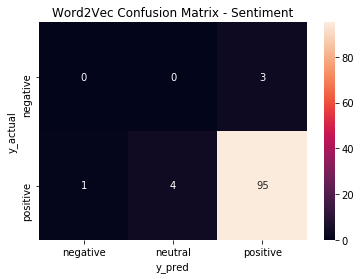

In [143]:
import seaborn as sns
confusion_matrix_word2vec_sent = pd.crosstab(word2vec_result_V2['Sentiment'], word2vec_result_V2['sentiment'], rownames=['y_actual'], colnames=['y_pred'], margins = True)
confusion_matrix_word2vec_sent.drop('All', inplace=True, axis=1)
confusion_matrix_word2vec_sent.drop('All', inplace=True)
sns.heatmap(confusion_matrix_word2vec_sent, annot=True, fmt='g')
plt.title('Word2Vec Confusion Matrix - Sentiment')

Text(0.5, 1.0, 'Word2Vec Confusion Matrix - Category')

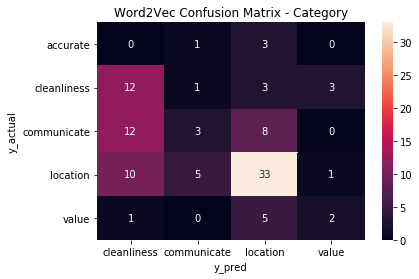

In [144]:
confusion_matrix_word2vec = pd.crosstab(word2vec_result_V2['Category'], word2vec_result_V2['category'], rownames=['y_actual'], colnames=['y_pred'], margins = True)
confusion_matrix_word2vec.drop('All', inplace=True, axis=1)
confusion_matrix_word2vec.drop('All', inplace=True)
sns.heatmap(confusion_matrix_word2vec, annot=True)
plt.title('Word2Vec Confusion Matrix - Category')

In [145]:
import numpy as np
word2vec_result_V2['error_cat'] = np.where(word2vec_result_V2['category']!=word2vec_result_V2['Category'], 1, 0)
word2vec_result_V2.head()

,id,category,avg_score,sentiment,review,Category,Sentiment,error_sent,error_cat
0,4845409,cleanliness,3.000000,positive,"Silvia's apartment was perfect. Very clean, exactly as in the pictures and very comfortable beds.\r<br/>\r<br/>In addition, Silvia is the perfect host. She went the extra mile by providing fresh bathroom slippers, towels, soap etc. Also we requested a late check-out which was no problem and provided at no extra charge.\r<br/>\r<br/>A truly positive experience. If I go back to Barcelona, I will be sure to contact Silvia again.",cleanliness,positive,0,0
1,5064565,location,3.333333,positive,"Very plaisant place, clean and great location! Good localisation, very close from the subway. Nice area. Flat spacious with all equipment. Dimitri was very nice and complaisant. Very recommanded!!!",cleanliness,positive,0,1
2,9329367,location,2.833333,positive,"Great host! Address all our questions in a timely manner. Was able to arrange a DVD player for us because we are spending Christmas in Barcelona and most sights are closed. \r<br/>\r<br/>Spacious apartment, plenty of room for our family of 8 (4 couples, age range from 20s-80s), room are good size for sharing. Lots of utensils, sufficient for cooking a Christmas meal at the apartment. Everyone is happy with the apartment and location. \r<br/>\r<br/>Great neighborhood, we were able to walk to most sights within 10-30 minutes. Only 10-15 min walk to Plaza Catalunya. Highly recommended. You get what you see. Great for large groups.",communicate,positive,0,1
3,12186167,cleanliness,2.916667,positive,"Our stay at David`s Apartment was perfect. It is very well located and you can reach everything very easily. The Apartment was very clean, and modern. Fully equipped with two balconies, even a Nespresso coffee machine. We stayed 5 nights and would always come back!",location,positive,0,1
4,13649065,cleanliness,3.333333,positive,"The apartment was great and very comfortable for the our company. All of the amenities that can be expected were there and the apartment was very clean and taken care of. Elsa was very helpful and accomodating. The neighbourhood was a good place to have as a base. Even though it is Close to the Sagrada Familia, it was a local, residential area.",cleanliness,positive,0,0


In [146]:
from sklearn import metrics
# accuracy: category
metrics.accuracy_score(word2vec_result_V2['Category'], word2vec_result_V2['category'])

0.4854368932038835

In [147]:
#f1 score: category
metrics.f1_score(word2vec_result_V2['Category'], word2vec_result_V2['category'], average='macro')

/Users/leesixian/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3130884517023131

In [2]:
import pandas as pd
word2vec_result_V2 = pd.read_csv('word2vec_V2.csv')

In [6]:
word2vec_result_V2.shape

(103, 9)

In [3]:
from sklearn import metrics
# accuracy: sentiment
metrics.accuracy_score(word2vec_result_V2['Sentiment'], word2vec_result_V2['sentiment'])

0.9223300970873787

In [5]:
from sklearn import metrics
# f1 score: sentiment
metrics.f1_score(word2vec_result_V2['Sentiment'], word2vec_result_V2['sentiment'],average='macro')

/Users/leesixian/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.3198653198653198

In [151]:
#output files (rows with error!)
import csv
word2vec_result_V2[word2vec_result_V2['error_sent']==1].to_csv('word2vec_V2_error_sent.csv',sep=",",quotechar='"',index=False,
            quoting=csv.QUOTE_ALL)

In [152]:
#output files (rows with error!)
word2vec_result_V2[word2vec_result_V2['error_cat']==1].to_csv('word2vec_V2_error_cat.csv',sep=",",quotechar='"',index=False,
            quoting=csv.QUOTE_ALL)

In [153]:
word2vec_result_V2.to_csv('word2vec_V2.csv',sep=",",quotechar='"',index=False,
            quoting=csv.QUOTE_ALL)

In [154]:
word2vec_result_V2.head()

,id,category,avg_score,sentiment,review,Category,Sentiment,error_sent,error_cat
0,4845409,cleanliness,3.000000,positive,"Silvia's apartment was perfect. Very clean, exactly as in the pictures and very comfortable beds.\r<br/>\r<br/>In addition, Silvia is the perfect host. She went the extra mile by providing fresh bathroom slippers, towels, soap etc. Also we requested a late check-out which was no problem and provided at no extra charge.\r<br/>\r<br/>A truly positive experience. If I go back to Barcelona, I will be sure to contact Silvia again.",cleanliness,positive,0,0
1,5064565,location,3.333333,positive,"Very plaisant place, clean and great location! Good localisation, very close from the subway. Nice area. Flat spacious with all equipment. Dimitri was very nice and complaisant. Very recommanded!!!",cleanliness,positive,0,1
2,9329367,location,2.833333,positive,"Great host! Address all our questions in a timely manner. Was able to arrange a DVD player for us because we are spending Christmas in Barcelona and most sights are closed. \r<br/>\r<br/>Spacious apartment, plenty of room for our family of 8 (4 couples, age range from 20s-80s), room are good size for sharing. Lots of utensils, sufficient for cooking a Christmas meal at the apartment. Everyone is happy with the apartment and location. \r<br/>\r<br/>Great neighborhood, we were able to walk to most sights within 10-30 minutes. Only 10-15 min walk to Plaza Catalunya. Highly recommended. You get what you see. Great for large groups.",communicate,positive,0,1
3,12186167,cleanliness,2.916667,positive,"Our stay at David`s Apartment was perfect. It is very well located and you can reach everything very easily. The Apartment was very clean, and modern. Fully equipped with two balconies, even a Nespresso coffee machine. We stayed 5 nights and would always come back!",location,positive,0,1
4,13649065,cleanliness,3.333333,positive,"The apartment was great and very comfortable for the our company. All of the amenities that can be expected were there and the apartment was very clean and taken care of. Elsa was very helpful and accomodating. The neighbourhood was a good place to have as a base. Even though it is Close to the Sagrada Familia, it was a local, residential area.",cleanliness,positive,0,0


## END